# Diabetes Prediction Using Machine Learning 

## Dataset :-  https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Import All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
%matplotlib inline
sns.set_style('whitegrid')

## Loading Dataset & Doing EDA

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,1
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,1
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


### Conclusion : Classification of Our Dataset Is Unreliable based on Last Column Before Our Targer Column (i.e blood_glucose_level & diabetes column)

### Checking For Missing Values

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Checking For Duplicated Values

In [6]:
df.duplicated().sum()

3854

### Removing Duplicates

In [7]:
df.drop_duplicates(keep="first",inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(96146, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,96146,3,Female,56161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,96146.0,NaN,NaN,NaN,41.794326,22.462948,0.08,24.0,43.0,59.0,80.0
hypertension,96146.0,NaN,NaN,NaN,0.077601,0.267544,0.0,0.0,0.0,0.0,1.0
heart_disease,96146.0,NaN,NaN,NaN,0.040803,0.197833,0.0,0.0,0.0,0.0,1.0
smoking_history,96146,6,never,34398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,96146.0,NaN,NaN,NaN,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,NaN,NaN,NaN,5.532609,1.073232,3.5,4.8,5.8,6.2,9.0
blood_glucose_level,96146.0,NaN,NaN,NaN,138.218231,40.909771,80.0,100.0,140.0,159.0,300.0
diabetes,96146.0,NaN,NaN,NaN,0.088241,0.283646,0.0,0.0,0.0,0.0,1.0


In [12]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

### Finding All Unique Values

In [13]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

    'never': Indicates individuals who have never smoked.
    'No Info': Suggests that there is no information available regarding their smoking history.
    'current': Represents individuals who currently smoke.
    'former': Indicates individuals who used to smoke but have quit.
    'ever': Possibly indicating individuals who have smoked at some point, irrespective of current status.
    'not current': Suggests individuals who are not currently smoking.

### Mapping Values To Unique Numerical Values

In [14]:
df['smoking_history'] = df['smoking_history'].fillna(-1).map({'never':0, 'No Info':1, 'current':2, 'former':3,'ever':4,'not current':5})
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0,25.19,6.6,140,1
1,Female,54.0,0,0,1,27.32,6.6,80,0
2,Male,28.0,0,0,0,27.32,5.7,158,1
3,Female,36.0,0,0,2,23.45,5.0,155,0
4,Male,76.0,1,1,2,20.14,4.8,155,0


In [15]:
df['smoking_history'].groupby(df.smoking_history).count()

smoking_history
0    34398
1    32887
2     9197
3     9299
4     3998
5     6367
Name: smoking_history, dtype: int64

In [16]:
df['smoking_history'].mean()

1.32095979031889

In [17]:
df['smoking_history'].median()

1.0

In [18]:
df['smoking_history'].mode()

0    0
Name: smoking_history, dtype: int64

<Axes: xlabel='smoking_history', ylabel='Count'>

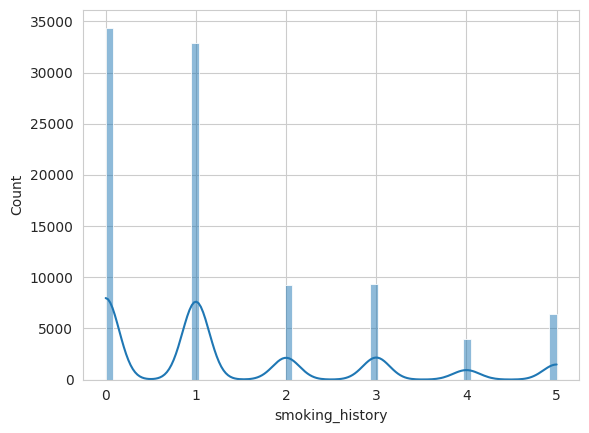

In [19]:
sns.histplot(df['smoking_history'],kde=True)

### Imputing Missing Values If Necessary

In [20]:
'''imputer = SimpleImputer(strategy='most_frequent')
df['smoking_history'].replace(1, np.nan, inplace=True)
imputed_data = imputer.fit_transform(df)
#imputed_data = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)
df_imputed '''

"imputer = SimpleImputer(strategy='most_frequent')\ndf['smoking_history'].replace(1, np.nan, inplace=True)\nimputed_data = imputer.fit_transform(df)\n#imputed_data = imputer.fit_transform(df)\ndf_imputed = pd.DataFrame(imputed_data, columns=df.columns)\ndf_imputed "

In [21]:
df['gender'].groupby(df.gender).count()

gender
Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

### Mapping Unique Numerical Values In Gender Column

In [22]:
df['gender']=df['gender'].map({"Male":1,"Other":0,"Female":2})

### As we can see after doing EDA our Dataset may have  Wrong Classification of  Diabetic Patient so Making it correct based  on medical data and medical assumptions provided from internet its better to use Gemini or ChatGPT for finding this Medical Assumptions

To label individuals as diabetic or not based on the provided data, we typically consider the HbA1c level and blood glucose level. The criteria for diabetes diagnosis may vary slightly depending on the specific guidelines followed, but generally speaking, the following criteria are often used:

    HbA1c level:
        Normal: Less than 5.7%
        Prediabetes: 5.7% to 6.4%
        Diabetes: 6.5% or higher

    Fasting blood glucose level:
        Normal: Less than 100 mg/dL
        Prediabetes: 100 mg/dL to 125 mg/dL
        Diabetes: 126 mg/dL or higher

Based on these criteria, we can evaluate each individual's diabetic status

## Correcting The Classification for Diabetes

In [23]:
df['diabetes'] = 0 

In [24]:
df.loc[(df['HbA1c_level'] >= 5.7) | (df['blood_glucose_level'] >= 100), 'diabetes'] = 1

In [25]:
df_filtered_0=df[df['diabetes'] == 0]
df_filtered_1=df[df['diabetes'] == 0]

In [26]:
df_filtered_0.shape

(8395, 9)

In [27]:
df_filtered_1.shape

(8395, 9)

## Plotting Correlation Heat Map

<Axes: >

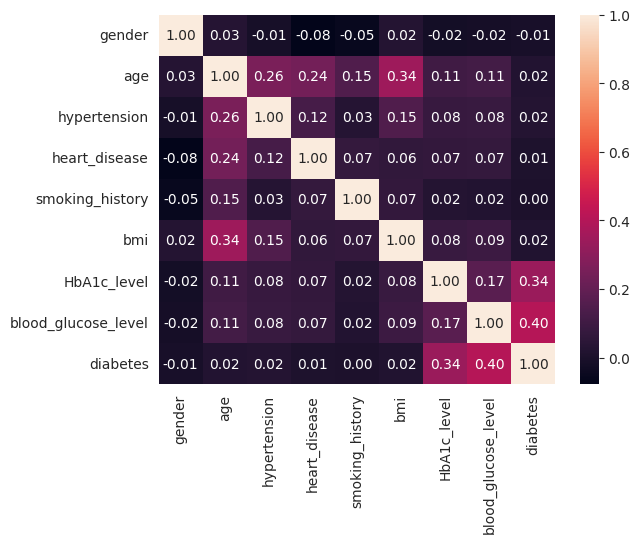

In [28]:
sns.heatmap(data=df.corr(), annot=True, fmt='.2f')

## Plotting BoxPlot To find Outliers

### The outliers appear as red circles with a larger size

<Axes: xlabel='gender', ylabel='blood_glucose_level'>

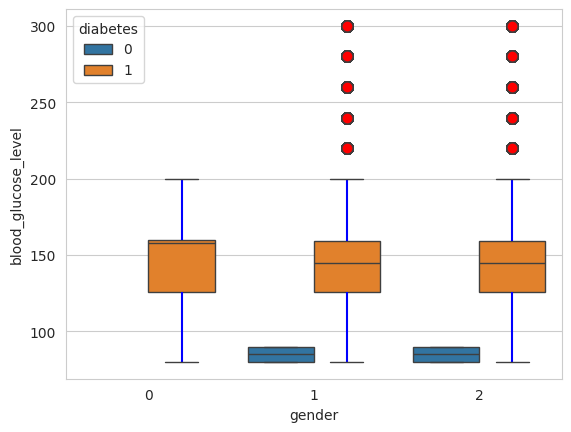

In [29]:
sns.boxplot(x='gender', y='blood_glucose_level',hue='diabetes',whiskerprops={'linewidth': 1.5, 'color': 'blue'}, 
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}, data=df)

<Axes: xlabel='gender', ylabel='HbA1c_level'>

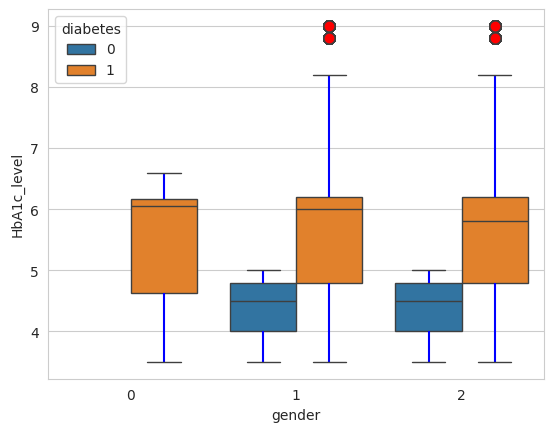

In [30]:
sns.boxplot(x='gender', y='HbA1c_level',hue='diabetes',whiskerprops={'linewidth': 1.5, 'color': 'blue'}, 
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}, data=df)

<Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>

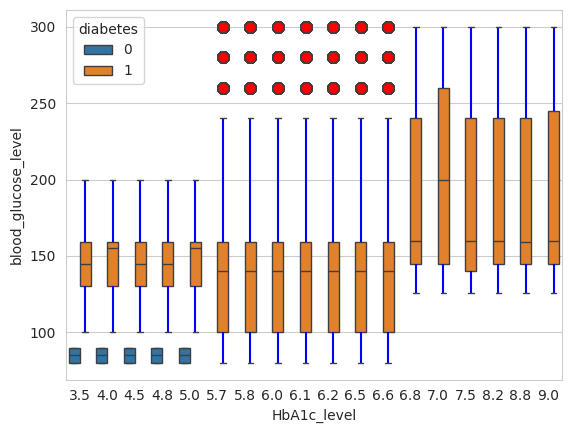

In [31]:
sns.boxplot(x='HbA1c_level', y='blood_glucose_level',hue='diabetes',whiskerprops={'linewidth': 1.5, 'color': 'blue'}, 
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}, data=df)

<Axes: xlabel='blood_glucose_level', ylabel='HbA1c_level'>

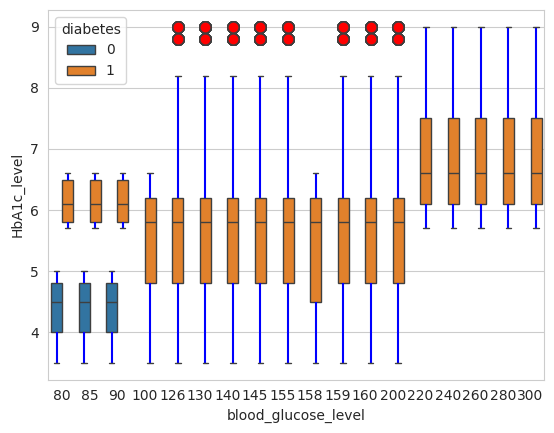

In [32]:
sns.boxplot(y='HbA1c_level', x='blood_glucose_level',hue='diabetes',whiskerprops={'linewidth': 1.5, 'color': 'blue'}, 
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}, data=df)

## Handeling Required Outliers 

In [33]:
df['blood_glucose_level'] = winsorize(df['blood_glucose_level'], limits=(0.05, 0.05))

<Axes: xlabel='gender', ylabel='blood_glucose_level'>

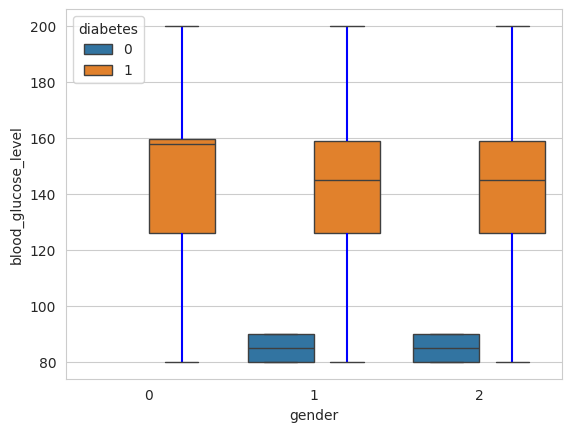

In [34]:
sns.boxplot(x='gender', y='blood_glucose_level',hue='diabetes',whiskerprops={'linewidth': 1.5, 'color': 'blue'}, 
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}, data=df)

In [35]:
dff=df#.replace(np.nan,1)
#dff.dropna(inplace=True)

In [36]:
X = dff.drop(columns='diabetes',axis=1)
y = dff['diabetes'] # Target
X,y

(       gender   age  hypertension  heart_disease  smoking_history    bmi  \
 0           2  80.0             0              1                0  25.19   
 1           2  54.0             0              0                1  27.32   
 2           1  28.0             0              0                0  27.32   
 3           2  36.0             0              0                2  23.45   
 4           1  76.0             1              1                2  20.14   
 ...       ...   ...           ...            ...              ...    ...   
 99994       2  36.0             0              0                1  24.60   
 99996       2   2.0             0              0                1  17.37   
 99997       1  66.0             0              0                3  27.83   
 99998       2  24.0             0              0                0  35.42   
 99999       2  57.0             0              0                2  22.43   
 
        HbA1c_level  blood_glucose_level  
 0              6.6            

## Splitting Data Into Train And Test Datasets

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## Making Pipline To find Better Classifier For Current Task

In [38]:
pipeline_hgb  = Pipeline([('scalar1',StandardScaler()),('hgb_classifier',HistGradientBoostingClassifier())])
pipeline_svc = Pipeline([('scalar2',StandardScaler()),('svc_classifier',SVC())])
pipeline_dt = Pipeline([('scalar3',StandardScaler()),('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('scalar4',StandardScaler()),('rf_classifier',RandomForestClassifier())])
pipeline_gbc = Pipeline([('scalar5',StandardScaler()),('gbc_classifier',GradientBoostingClassifier())])
pipeline_sgd = Pipeline([('scalar6',StandardScaler()),('sgd_classifier',SGDClassifier())])

In [39]:
pipelines = [pipeline_hgb,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc,
            pipeline_sgd]

In [40]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [41]:
pipe_dict = {0:'HGB',
             1:'SVC',
             2:'DT',
             3: 'RF',
             4: 'GBC',
             5: 'SGD'}

### Selecting Best Classifier Based On Highest Accuracy Given

In [42]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)*100))

HGB Test Accuracy:100.0
SVC Test Accuracy:99.9011960478419
DT Test Accuracy:100.0
RF Test Accuracy:100.0
GBC Test Accuracy:100.0
SGD Test Accuracy:97.88871554862195


In [43]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
model1=HistGradientBoostingClassifier()
model1.fit(X_train,y_train)
model2=GradientBoostingClassifier()
model2.fit(X_train,y_train)
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
model4=DecisionTreeClassifier()
model4.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
X_test_scaled = scaler.transform(X_test)  # Scale the testing data using the same scaler

# Make predictions using each model
y_pred_model1 = model1.predict(X_test_scaled)
y_pred_model2 = model2.predict(X_test_scaled)
y_pred_model3 = model3.predict(X_test_scaled)
y_pred_model4 = model4.predict(X_test_scaled)

# Calculate accuracy for each model
accuracy_model1 = accuracy_score(y_test, y_pred_model1)
accuracy_model2 = accuracy_score(y_test, y_pred_model2)
accuracy_model3 = accuracy_score(y_test, y_pred_model3)
accuracy_model4 = accuracy_score(y_test, y_pred_model4)

# Print the accuracy of each model
print("Accuracy of HistGradientBoostingClassifier:", accuracy_model1)
print("Accuracy of GradientBoostingClassifier:", accuracy_model2)
print("Accuracy of RandomForestClassifier:", accuracy_model3)
print("Accuracy of DecisionTreeClassifier:", accuracy_model4)

Accuracy of HistGradientBoostingClassifier: 1.0
Accuracy of GradientBoostingClassifier: 1.0
Accuracy of RandomForestClassifier: 1.0
Accuracy of DecisionTreeClassifier: 1.0


### As 4 of the above classifiers giving us the same value we can go for voting classifier so it  will give result based on voting  

#### As we are taking even number so voting strategy should be ```soft``` ,it predicts the class label based on the argmax of the sums of the predicted probabilities

##### ```hard```, uses predicted class labels for majority rule voting there may be situation when there is 50/50 voting so it may lead to error

In [45]:
estimators = [
    ('HGB', model1),
    ('GBC', model2),
    ('RF', model3),
    ('DT', model4)
]
vc = VotingClassifier(estimators=estimators, voting='soft')
vc.fit(X_train, y_train)
y_pred_voting = vc.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy of VotingClassifier:", accuracy_voting)

Accuracy of VotingClassifier: 1.0


## Training Model On Whole Dataset

### Doing Normalization Of Values Using Standard Scaler fit_transform method

In [46]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)
model=VotingClassifier(estimators=estimators, voting='soft',verbose=True)#soft as there are even no of estimators
model.fit(X,y)
X,y

[Voting] ...................... (1 of 4) Processing HGB, total=   1.4s
[Voting] ...................... (2 of 4) Processing GBC, total=  11.3s
[Voting] ....................... (3 of 4) Processing RF, total=   6.5s
[Voting] ....................... (4 of 4) Processing DT, total=   0.1s


(       gender   age  hypertension  heart_disease  smoking_history    bmi  \
 0           2  80.0             0              1                0  25.19   
 1           2  54.0             0              0                1  27.32   
 2           1  28.0             0              0                0  27.32   
 3           2  36.0             0              0                2  23.45   
 4           1  76.0             1              1                2  20.14   
 ...       ...   ...           ...            ...              ...    ...   
 99994       2  36.0             0              0                1  24.60   
 99996       2   2.0             0              0                1  17.37   
 99997       1  66.0             0              0                3  27.83   
 99998       2  24.0             0              0                0  35.42   
 99999       2  57.0             0              0                2  22.43   
 
        HbA1c_level  blood_glucose_level  
 0              6.6            

## Saving The Model

### Saving Model Without Standard Scaler fit_transform

In [47]:
joblib.dump(model,"Diabetese_Prediction.joblib")

['Diabetese_Prediction.joblib']

### Saving Model With Standard Scaler fit_transform

In [48]:
model.fit(X_Scaled,y)
X_Scaled,y

[Voting] ...................... (1 of 4) Processing HGB, total=   2.4s
[Voting] ...................... (2 of 4) Processing GBC, total=  11.0s
[Voting] ....................... (3 of 4) Processing RF, total=   7.1s
[Voting] ....................... (4 of 4) Processing DT, total=   0.1s


(array([[ 8.43459189e-01,  1.70083970e+00, -2.90050377e-01, ...,
         -3.14947071e-01,  9.94562951e-01,  1.09119370e-01],
        [ 8.43459189e-01,  5.43372045e-01, -2.90050377e-01, ...,
         -2.15895425e-04,  9.94562951e-01, -1.58354098e+00],
        [-1.18376945e+00, -6.14095608e-01, -2.90050377e-01, ...,
         -2.15895425e-04,  1.55970122e-01,  6.16917477e-01],
        ...,
        [-1.18376945e+00,  1.07758788e+00, -2.90050377e-01, ...,
          7.51422735e-02,  1.55970122e-01,  5.32284459e-01],
        [ 8.43459189e-01, -7.92167555e-01, -2.90050377e-01, ...,
          1.19664914e+00, -1.42803856e+00, -1.01932087e+00],
        [ 8.43459189e-01,  6.76926005e-01, -2.90050377e-01, ...,
         -7.22767750e-01,  9.94562951e-01, -1.30143093e+00]]),
 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 99994    1
 99996    1
 99997    1
 99998    1
 99999    1
 Name: diabetes, Length: 96146, dtype: int64)

In [49]:
joblib.dump(model,"Diabetese_Prediction.pkl")

['Diabetese_Prediction.pkl']